# Data Science 02: Explorační analýza dat (Data Exploration)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy
#%pip install matplotlib

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import matplotlib as plt
from matplotlib import pyplot

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df‘
other_path = "../../data/01_DataScience/clean_timelaps.csv"
df = pd.read_csv(other_path)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
0,1,CORNER,13:52:18,13:52:24,13:52:41,13:52:59,49938,49944,49961,49979,2,6,17,18,41
1,2,HALF,13:52:59,13:53:02,13:53:19,13:53:35,49979,49982,49999,50015,3,3,17,16,36
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:37,50160,50166,50180,50197,1,6,14,17,37
3,6,BASIC,13:58:10,13:58:17,13:58:31,13:58:45,50290,50297,50311,50325,1,7,14,14,35
4,9,BASIC,14:00:34,14:00:42,14:00:55,14:01:19,50434,50442,50455,50479,1,8,13,24,45


### Základní charakteristika datové sady

#### Datové typy

In [4]:
df.dtypes

id                 int64
type_brick        object
time_start        object
time_verif        object
time_dest         object
time_end          object
time_start_sec     int64
time_verif_sec     int64
time_dest_sec      int64
time_end_sec       int64
type               int64
start_to_verif     int64
verif_to_dest      int64
dest_to_end        int64
total_time         int64
dtype: object

#### Popis datové sady

In [5]:
df.describe()

,id,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
count,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,69.622642,53179.698113,53188.084906,53203.00000,53220.660377,1.292453,8.386792,14.915094,17.660377,40.962264
std,37.319586,2881.268663,2881.518674,2880.72757,2879.756921,0.780317,3.432536,3.447892,6.170416,6.358982
min,1.000000,48678.000000,48684.000000,48704.00000,48724.000000,1.000000,2.000000,6.000000,6.000000,32.000000
25%,39.250000,50539.750000,50547.250000,50565.00000,50580.250000,1.000000,6.000000,13.000000,14.000000,36.000000
50%,67.500000,51736.500000,51745.500000,51757.00000,51772.500000,1.000000,8.000000,15.000000,16.000000,39.000000
75%,102.750000,55879.250000,55885.750000,55905.75000,55921.250000,1.000000,10.000000,17.000000,20.750000,45.750000
max,136.000000,57450.000000,57467.000000,57473.00000,57482.000000,4.000000,21.000000,25.000000,38.000000,57.000000


#### Základní informace o datové sadě

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              106 non-null    int64 
 1   type_brick      106 non-null    object
 2   time_start      106 non-null    object
 3   time_verif      106 non-null    object
 4   time_dest       106 non-null    object
 5   time_end        106 non-null    object
 6   time_start_sec  106 non-null    int64 
 7   time_verif_sec  106 non-null    int64 
 8   time_dest_sec   106 non-null    int64 
 9   time_end_sec    106 non-null    int64 
 10  type            106 non-null    int64 
 11  start_to_verif  106 non-null    int64 
 12  verif_to_dest   106 non-null    int64 
 13  dest_to_end     106 non-null    int64 
 14  total_time      106 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 12.6+ KB


### Proces standardizace dat (Data Standardization)

#### Proces normalizace dat (Data Normalization)
Normalizace představuje proces transformace hodnot vybraných proměnných do srovnatelného rozsahu. Typické přístupy zahrnují standardizaci na nulovou střední hodnotu, úpravu rozptylu na jednotkovou hodnotu nebo lineární škálování do intervalu ⟨0, 1⟩.

#### Diskretizace spojitých proměnných (binning)

Text(0.5, 1.0, 'Klasifikace vzorků podle doby trvání pracovního cyklu')

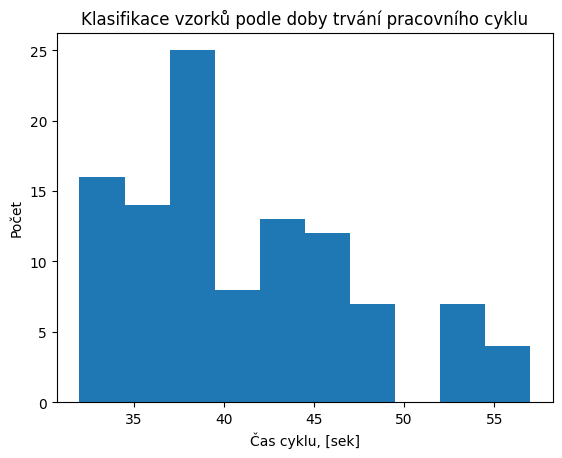

In [7]:
%matplotlib inline

plt.pyplot.hist(df["total_time"])

plt.pyplot.xlabel("Čas cyklu, [sek]")
plt.pyplot.ylabel("Počet")
plt.pyplot.title("Klasifikace vzorků podle doby trvání pracovního cyklu")

In [8]:
# Definice intervalů (binů) pro diskrétní rozdělení dat
bins = np.linspace(min(df["total_time"]), max(df["total_time"]), 8)
bins

array([32.        , 35.57142857, 39.14285714, 42.71428571, 46.28571429,
       49.85714286, 53.42857143, 57.        ])

In [9]:
# pojmenování intervalů (binů) pro diskrétní rozdělení dat
group_names = ['Extremely short','Very short','Short', 'Normal', 'Long','Very long','Extremely long']

In [10]:
# Kategorizace intervalů
df['total_time_binned'] = pd.cut(df['total_time'], bins, labels=group_names, include_lowest=True )
df[['total_time','total_time_binned']].head(20)

,total_time,total_time_binned
0,41,Short
1,36,Very short
2,37,Very short
3,35,Extremely short
4,45,Normal
5,34,Extremely short
6,34,Extremely short
7,32,Extremely short
8,47,Long
9,34,Extremely short


In [11]:
# Výpočet počtu vzorků v intervalech
df["total_time"].value_counts()

total_time
36    10
38     9
46     9
39     9
37     7
32     7
34     6
44     6
47     5
41     5
35     4
52     4
43     4
45     3
42     3
40     3
33     3
57     2
56     2
54     2
49     1
53     1
48     1
Name: count, dtype: int64

### Grafické znázornění intervalového rozdělení

Text(0.5, 1.0, 'Klasifikace vzorků podle doby trvání pracovního cyklu')

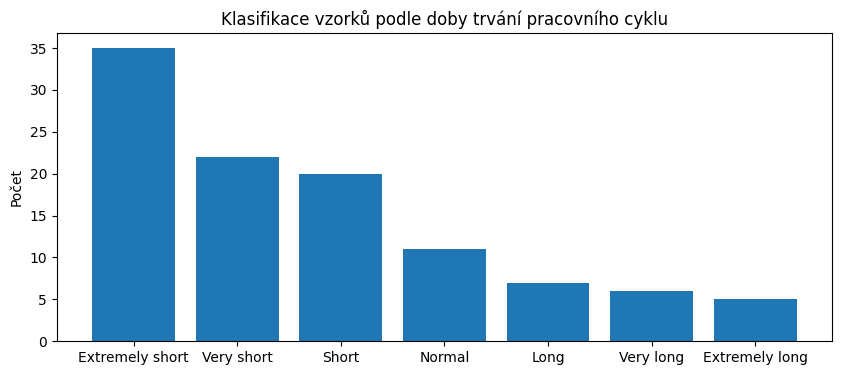

In [12]:
%matplotlib inline
pyplot.figure(figsize=(10,4))
pyplot.bar(group_names, df["total_time_binned"].value_counts(), )

pyplot.ylabel("Počet")
pyplot.title("Klasifikace vzorků podle doby trvání pracovního cyklu")

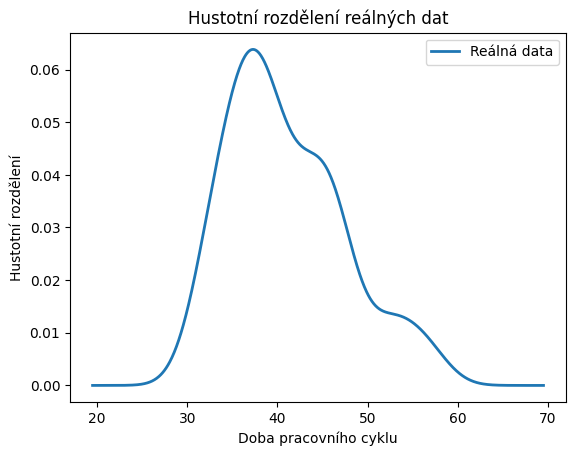

In [13]:
# Plot density
df['total_time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Reálná data')
pyplot.legend()
pyplot.xlabel("Doba pracovního cyklu")
pyplot.ylabel("Hustotní rozdělení")
pyplot.title('Hustotní rozdělení reálných dat')
pyplot.show()

### Indikátorová (dummy) proměnná

In [14]:
df.columns

Index(['id', 'type_brick', 'time_start', 'time_verif', 'time_dest', 'time_end',
       'time_start_sec', 'time_verif_sec', 'time_dest_sec', 'time_end_sec',
       'type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time',
       'total_time_binned'],
      dtype='object')

In [15]:
dummy_variable_1 = pd.get_dummies(df["type_brick"])
dummy_variable_1.head()

,BASIC,CORNER,END,HALF
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [16]:
# Změna názvů sloupců pro větší přehlednost
dummy_variable_1.rename(columns={'BASIC':'brick_basic', 'CORNER':'brick_corner', 'HALF':'brick_half', 'END':'brick_end'}, inplace=True)
dummy_variable_1.head()

,brick_basic,brick_corner,brick_end,brick_half
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [17]:
# Sloučení datových rámců "df" a "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_end,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:41,13:52:59,49938,49944,49961,49979,2,6,17,18,41,Short,False,True,False,False
1,2,HALF,13:52:59,13:53:02,13:53:19,13:53:35,49979,49982,49999,50015,3,3,17,16,36,Very short,False,False,False,True
2,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:37,50160,50166,50180,50197,1,6,14,17,37,Very short,True,False,False,False
3,6,BASIC,13:58:10,13:58:17,13:58:31,13:58:45,50290,50297,50311,50325,1,7,14,14,35,Extremely short,True,False,False,False
4,9,BASIC,14:00:34,14:00:42,14:00:55,14:01:19,50434,50442,50455,50479,1,8,13,24,45,Normal,True,False,False,False


### Export datové sady do formátu CSV

In [18]:
df.to_csv('../../data/01_DataScience/exploration_timelaps.csv', index=False)

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-20 | 1.1 | Vjačeslav Usmanov| added DS_02_Exploration.ipynb |
| 2026-02-11 | 1.2 | Vjačeslav Usmanov| changed DS_02_Exploration.ipynb |